In [6]:
# libs
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from datetime import datetime
import os
from tqdm import tqdm  # Import the tqdm function to visualize the progress of the loop

# bar plots
import matplotlib.pyplot as plt
import seaborn as sns

# TradingView (Data Load)

In [2]:
# today's date string for file namine automation
today_date_str = datetime.now().strftime("_%Y-%m-%d.csv")
# today_date_str = '_2024-02-29.csv'
print(today_date_str)

_2024-03-04.csv


In [3]:
# concat base file name with today's date string
filename = f"trading_view_raw_data/tv_screen_gap-up{today_date_str}"

# read in trading view raw data
trading_view_raw_df = pd.read_csv(filename)

print(f'{len(trading_view_raw_df.index)} U.S. Stocks \n$(pre-market change) > $0.00 USD')
trading_view_raw_df.head(5)

1417 U.S. Stocks 
$(pre-market change) > $0.00 USD


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,Pre-market Gap %,Float shares outstanding,Volume 1 day,Volume 1 week,Pre-market Volume,Average Volume 10 days,Average Volume 30 days,Average Volume 90 days,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Relative Volume at Time,Beta 1 year,Beta 3 years,Beta 5 years,Relative Volume 1 minute,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,New high 1 month,New high 1 month - Currency,New high 3 months,New high 3 months - Currency,New high 6 months,New high 6 months - Currency,New high 52 weeks,New high 52 weeks - Currency,New high All Time,New high All Time - Currency,High 5 minutes,High 5 minutes - Currency,High 15 minutes,High 15 minutes - Currency,High 30 minutes,High 30 minutes - Currency,High 1 hour,High 1 hour - Currency,High 2 hours,High 2 hours - Currency,High 4 hours,High 4 hours - Currency,High 1 day,High 1 day - Currency,High 1 week,High 1 week - Currency,High 1 month,High 1 month - Currency,"Revenue per employee, Annual","Revenue per employee, Annual - Currency",Simple Moving Average (5) 1 minute,Simple Moving Average (8) 1 minute,Simple Moving Average (5) 5 minutes,Simple Moving Average (13) 5 minutes,"Bollinger Bands (20) 1 minute, Upper","Bollinger Bands (20) 1 minute, Basis","Bollinger Bands (20) 1 minute, Lower","Bollinger Bands (20) 5 minutes, Upper","Bollinger Bands (20) 5 minutes, Basis","Bollinger Bands (20) 5 minutes, Lower"
0,NVDA,NVIDIA Corporation,NASDAQ,2056974945067.9995,USD,822.79,USD,832.12,USD,19.1900,USD,2.332308,1.133947,2399495000,47910122,227517857.0,714348,58601245.3,51649101.16666665,45518921.96666679,4.013343,2.755075,3.751066,813.380100,68.93059104,Electronic Technology,0.88166471,1.7804065,2.3419523,1.7245569,3.135944,3.204538,2.339695,1.240891,0.62167874,0.35385935,0.57668082,0.82587353,1.03748991,0.04760904,823.940,USD,823.940,USD,823.940,USD,823.940,USD,823.94000,USD,823.00,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,2058175.67567568,USD,822.05814,821.419837,820.70196,820.068231,822.588829,820.747880,818.906931,822.399969,820.421830,818.443691
1,AMZN,"Amazon.com, Inc.",NASDAQ,1851239029437.9995,USD,178.22,USD,178.63,USD,0.0500,USD,0.028055,0.230053,9227833763.2,31981150,189477337.0,114357,43924862.69999995,49815318.56666676,50086630.64444441,1.507923,1.459678,1.885879,177.671667,61.67635659,Retail Trade,0.84934379,1.1224031,1.3817025,1.1703976,3.843497,4.269503,3.458258,2.309432,0.90263233,0.5336574,0.67937399,0.69961855,0.86642576,0.02842609,178.725,USD,178.725,USD,178.725,USD,178.725,USD,188.65391,USD,178.50,USD,178.655,USD,178.655,USD,178.655,USD,178.655,USD,178.725,USD,178.725,USD,178.725,USD,178.725,USD,376908.19672131,USD,178.35400,178.378750,178.45660,178.505000,178.672103,178.468285,178.264467,178.681687,178.503105,178.324523
2,META,"Meta Platforms, Inc.",NASDAQ,1280566236636,USD,502.30,USD,504.13,USD,1.8500,USD,0.368306,0.364324,2193265045.7999997,15884827,69243368.0,65727,16356065.2,21279881.56666667,19075083.67777778,2.870794,1.761630,2.454323,499.466667,33.71978276,Technology Services,1.2286424,1.3430792,1.1534996,1.2083921,3.413075,3.443085,2.512828,2.026864,0.8957383,0.54864231,0.87975527,0.92413741,0.77808729,0.0359899,504.250,USD,504.250,USD,504.250,USD,504.250,USD,504.25000,USD,502.65,USD,502.760,USD,503.290,USD,503.290,USD,503.290,USD,504.250,USD,504.250,USD,504.250,USD,504.250,USD,2003981.16374764,USD,502.27300,502.283125,502.53084,502.463762,503.167257,502.485460,501.803663,503.458439,502.408645,501.358851
3,BRK.B,Berkshire Hathaway Inc. New,NYSE,880552078824,U

In [4]:
def categorize_market_cap(df):
    # Convert 'Market capitalization' to numeric, coercing errors to NaN
    df['Market capitalization'] = pd.to_numeric(df['Market capitalization'], errors='coerce')
    
    # Define the conditions for each market cap category using regular number notation
    conditions = [
        # Titans
        (df['Market capitalization'] >= 200000000000),  # 200 billion and above
        #Large Cap
        (df['Market capitalization'] >= 10000000000) & (df['Market capitalization'] < 200000000000),  # 10 billion to 200 billion
        # Midlers
        (df['Market capitalization'] >= 2000000000) & (df['Market capitalization'] < 10000000000),  # 2 billion to 10 billion
        # Small Cap
        (df['Market capitalization'] >= 300000000) & (df['Market capitalization'] < 2000000000),  # 300 million to 2 billion
        # Micro Cap
        (df['Market capitalization'] > 50000000) & (df['Market capitalization'] < 300000000),  # 300 million and below (excluding 50 million and below)
        # Shrimp
        (df['Market capitalization'] <= 50000000)  # 50 million and below
    ]
    
    # Define the category names corresponding to each condition
    categories = ['Titans', 'Large caps', 'Midlers', 'Small caps', 'Micro caps', 'Shrimp']
    
    # Use np.select to assign categories based on conditions
    df['marketCapType'] = np.select(conditions, categories, default='Undefined')
    
    return df


In [7]:
# EXECUTE
trading_view_raw_df = categorize_market_cap(trading_view_raw_df)
trading_view_raw_df.head(5)

,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,Pre-market Gap %,Float shares outstanding,Volume 1 day,Volume 1 week,Pre-market Volume,Average Volume 10 days,Average Volume 30 days,Average Volume 90 days,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Relative Volume at Time,Beta 1 year,Beta 3 years,Beta 5 years,Relative Volume 1 minute,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,New high 1 month,New high 1 month - Currency,New high 3 months,New high 3 months - Currency,New high 6 months,New high 6 months - Currency,New high 52 weeks,New high 52 weeks - Currency,New high All Time,New high All Time - Currency,High 5 minutes,High 5 minutes - Currency,High 15 minutes,High 15 minutes - Currency,High 30 minutes,High 30 minutes - Currency,High 1 hour,High 1 hour - Currency,High 2 hours,High 2 hours - Currency,High 4 hours,High 4 hours - Currency,High 1 day,High 1 day - Currency,High 1 week,High 1 week - Currency,High 1 month,High 1 month - Currency,"Revenue per employee, Annual","Revenue per employee, Annual - Currency",Simple Moving Average (5) 1 minute,Simple Moving Average (8) 1 minute,Simple Moving Average (5) 5 minutes,Simple Moving Average (13) 5 minutes,"Bollinger Bands (20) 1 minute, Upper","Bollinger Bands (20) 1 minute, Basis","Bollinger Bands (20) 1 minute, Lower","Bollinger Bands (20) 5 minutes, Upper","Bollinger Bands (20) 5 minutes, Basis","Bollinger Bands (20) 5 minutes, Lower",marketCapType
0,NVDA,NVIDIA Corporation,NASDAQ,2.056975e+12,USD,822.79,USD,832.12,USD,19.1900,USD,2.332308,1.133947,2399495000,47910122,227517857.0,714348,58601245.3,51649101.16666665,45518921.96666679,4.013343,2.755075,3.751066,813.380100,68.93059104,Electronic Technology,0.88166471,1.7804065,2.3419523,1.7245569,3.135944,3.204538,2.339695,1.240891,0.62167874,0.35385935,0.57668082,0.82587353,1.03748991,0.04760904,823.940,USD,823.940,USD,823.940,USD,823.940,USD,823.94000,USD,823.00,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,823.000,USD,2058175.67567568,USD,822.05814,821.419837,820.70196,820.068231,822.588829,820.747880,818.906931,822.399969,820.421830,818.443691,Titans
1,AMZN,"Amazon.com, Inc.",NASDAQ,1.851239e+12,USD,178.22,USD,178.63,USD,0.0500,USD,0.028055,0.230053,9227833763.2,31981150,189477337.0,114357,43924862.69999995,49815318.56666676,50086630.64444441,1.507923,1.459678,1.885879,177.671667,61.67635659,Retail Trade,0.84934379,1.1224031,1.3817025,1.1703976,3.843497,4.269503,3.458258,2.309432,0.90263233,0.5336574,0.67937399,0.69961855,0.86642576,0.02842609,178.725,USD,178.725,USD,178.725,USD,178.725,USD,188.65391,USD,178.50,USD,178.655,USD,178.655,USD,178.655,USD,178.655,USD,178.725,USD,178.725,USD,178.725,USD,178.725,USD,376908.19672131,USD,178.35400,178.378750,178.45660,178.505000,178.672103,178.468285,178.264467,178.681687,178.503105,178.324523,Titans
2,META,"Meta Platforms, Inc.",NASDAQ,1.280566e+12,USD,502.30,USD,504.13,USD,1.8500,USD,0.368306,0.364324,2193265045.7999997,15884827,69243368.0,65727,16356065.2,21279881.56666667,19075083.67777778,2.870794,1.761630,2.454323,499.466667,33.71978276,Technology Services,1.2286424,1.3430792,1.1534996,1.2083921,3.413075,3.443085,2.512828,2.026864,0.8957383,0.54864231,0.87975527,0.92413741,0.77808729,0.0359899,504.250,USD,504.250,USD,504.250,USD,504.250,USD,504.25000,USD,502.65,USD,502.760,USD,503.290,USD,503.290,USD,503.290,USD,504.250,USD,504.250,USD,504.250,USD,504.250,USD,2003981.16374764,USD,502.27300,502.283125,502.53084,502.463762,503.167257,502.485460,501.803663,503.458439,502.408645,501.358851,Titans
3,BRK.B,Berkshire Hathaway Inc. N

In [8]:
# drop NaNs
tv_df = trading_view_raw_df.dropna()
# get simple count of NaNs total. should be 0
print(f'NaNs = {tv_df.isna().sum().sum()}')

# if there are no NaNs, print "No NaNs in DataFrame! Success!", else print the NaN count and "There are x NaNs in DataFrame, check your code dumb dumb!"
if tv_df.isna().sum().sum() == 0:
    nan_count = tv_df.isna().sum().sum()
    print(f"There are zero {nan_count} NaNs in DataFrame! Nice work!")
else:
    print(f"There are {tv_df.isna().sum().sum()} NaNs in DataFrame, check your code dumb dumb!")


NaNs = 0
There are zero 0 NaNs in DataFrame! Nice work!


In [9]:
mc_groups = trading_view_raw_df['marketCapType'].value_counts().reset_index()
mc_groups.columns = ['marketCapType', 'count']  # Rename columns for clarity

# Calculate percentage for each market cap type and add it to the DataFrame
mc_groups['percentage'] = (mc_groups['count'] / mc_groups['count'].sum()) * 100

# print total "there are etc."
print(f'There are still the same {len(trading_view_raw_df.index)} U.S. Stocks in the dataframe \n$(pre-market change) > $0.00 USD')
# Display the enhanced DataFrame
mc_groups

There are still the same 1417 U.S. Stocks in the dataframe 
$(pre-market change) > $0.00 USD


,marketCapType,count,percentage
0,Small caps,340,23.994354
1,Midlers,297,20.959774
2,Shrimp,256,18.066337
3,Large caps,243,17.148906
4,Micro caps,242,17.078335
5,Titans,23,1.623147
6,Undefined,16,1.129146


In [10]:
# print length of df
print(f'{len(tv_df.index)} U.S. Stocks \n$(pre-market change) > $0.00 USD')
# print sample head
tv_df.sample(5)

1401 U.S. Stocks 
$(pre-market change) > $0.00 USD


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,Pre-market Gap %,Float shares outstanding,Volume 1 day,Volume 1 week,Pre-market Volume,Average Volume 10 days,Average Volume 30 days,Average Volume 90 days,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Relative Volume at Time,Beta 1 year,Beta 3 years,Beta 5 years,Relative Volume 1 minute,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,New high 1 month,New high 1 month - Currency,New high 3 months,New high 3 months - Currency,New high 6 months,New high 6 months - Currency,New high 52 weeks,New high 52 weeks - Currency,New high All Time,New high All Time - Currency,High 5 minutes,High 5 minutes - Currency,High 15 minutes,High 15 minutes - Currency,High 30 minutes,High 30 minutes - Currency,High 1 hour,High 1 hour - Currency,High 2 hours,High 2 hours - Currency,High 4 hours,High 4 hours - Currency,High 1 day,High 1 day - Currency,High 1 week,High 1 week - Currency,High 1 month,High 1 month - Currency,"Revenue per employee, Annual","Revenue per employee, Annual - Currency",Simple Moving Average (5) 1 minute,Simple Moving Average (8) 1 minute,Simple Moving Average (5) 5 minutes,Simple Moving Average (13) 5 minutes,"Bollinger Bands (20) 1 minute, Upper","Bollinger Bands (20) 1 minute, Basis","Bollinger Bands (20) 1 minute, Lower","Bollinger Bands (20) 5 minutes, Upper","Bollinger Bands (20) 5 minutes, Basis","Bollinger Bands (20) 5 minutes, Lower",marketCapType
511,SANA,"Sana Biotechnology, Inc.",NASDAQ,2.484444e+09,USD,11.27,USD,11.32,USD,0.12,USD,1.064774,0.443656,108923797.696,5333207,17727113.0,8194,2854334.3,2536682.1,2780350.74444444,18.081181,11.174476,10.024242,11.370000,-,Health Technology,2.25379662,2.613996,1.6197435,1.6197435,1.896385,4.082865,3.190235,1.872775,0.85503577,0.55668696,0.99102665,1.87716827,1.00457653,0.13675925,12.0000,USD,12.00,USD,12.0000,USD,12.00,USD,44.60,USD,11.29,USD,11.29,USD,11.29,USD,11.29,USD,11.29,USD,11.65,USD,12.00,USD,12.00,USD,12.00,USD,0,USD,11.23900,11.215000,11.21900,11.241154,11.281753,11.186005,11.090257,11.362518,11.259000,11.155482,Midlers
379,GME,GameStop Corporation,NYSE,4.567439e+09,USD,14.95,USD,15.00,USD,0.07,USD,0.468227,0.334448,266299750.52999997,4899272,15052813.0,107070,2700807.6,2760323,5107692.15555556,7.855050,5.007680,4.780792,14.677000,-,Retail Trade,2.3071265,1.7778419,1.9320447,-0.3841811,6.284701,4.192179,1.369975,1.637312,1.15986295,0.80217845,3.34691533,1.99894032,1.0149485,0.05574887,15.2300,USD,18.59,USD,19.4800,USD,27.65,USD,120.75,USD,14.95,USD,14.95,USD,14.95,USD,14.95,USD,14.95,USD,15.09,USD,15.09,USD,15.09,USD,15.09,USD,538836.36363636,USD,14.88998,14.877500,14.86200,14.821977,14.917124,14.853175,14.789226,14.950421,14.841190,14.731959,Midlers
354,BROS,Dutch Bros Inc.,NYSE,5.272542e+09,USD,29.67,USD,30.15,USD,0.58,USD,1.954837,1.617796,61214998.95,1720381,17750186.0,22773,3278227.3,1877144.26666667,1603723.41111111,4.223386,4.725469,3.756371,29.393333,944.9044586,Consumer Non-Durables,0.4270618,1.2570244,2.405327,2.405327,3.244048,5.323149,4.686310,3.426416,1.44528018,0.49050799,0.49371373,0.53884087,2.44246809,0.06344377,30.0700,USD,32.31,USD,32.3100,USD,35.18,USD,81.40,USD,29.69,USD,29.76,USD,29.76,USD,29.76,USD,29.76,USD,29.86,USD,29.86,USD,30.07,USD,29.86,USD,40240.66666667,USD,29.65200,29.666875,29.58802,29.582700,29.774439,29.607255,29.440071,29.879754,29.646505,29.413256,Midlers
1270,HEPA,"Hepion Pharmaceuticals, Inc.",NASDAQ,1.375045e+07,USD,3.17,USD,3.12,USD,0.23,USD,7.255521,-1.577287,4275993.85272,93830,377087.0,2287,108803.2,116417.9,83659.58888889,12.000000,13.524019,19.339078,3.166667,-,H

In [11]:
# show unique values for 'marketCapType'
print(tv_df['marketCapType'].unique())
print()
# get tv_df columns
print(tv_df.columns)

['Titans' 'Large caps' 'Midlers' 'Small caps' 'Micro caps' 'Shrimp']

Index(['Symbol', 'Description', 'Exchange', 'Market capitalization',
       'Market capitalization - Currency', 'Price', 'Price - Currency',
       'Pre-market Open', 'Pre-market Open - Currency', 'Pre-market Change',
       'Pre-market Change - Currency', 'Pre-market Change %',
       'Pre-market Gap %', 'Float shares outstanding', 'Volume 1 day',
       'Volume 1 week', 'Pre-market Volume', 'Average Volume 10 days',
       'Average Volume 30 days', 'Average Volume 90 days', 'Volatility 1 day',
       'Volatility 1 week', 'Volatility 1 month',
       'Volume Weighted Average Price 1 day', 'Price to earnings ratio',
       'Sector', 'Relative Volume at Time', 'Beta 1 year', 'Beta 3 years',
       'Beta 5 years', 'Relative Volume 1 minute', 'Relative Volume 5 minutes',
       'Relative Volume 15 minutes', 'Relative Volume 30 minutes',
       'Relative Volume 1 hour', 'Relative Volume 2 hours',
       'Relative Volume 

In [12]:
# drop undefined
tv_df = tv_df[tv_df['marketCapType'] != 'Undefined']

mc_groups2 = tv_df['marketCapType'].value_counts().reset_index()
mc_groups2.columns = ['marketCapType', 'count']  # Rename columns for clarity

# calculate percentage for each market cap type and add it to the DataFrame
mc_groups2['percentage'] = (mc_groups2['count'] / mc_groups2['count'].sum()) * 100

mc_groups2
print(mc_groups2)


  marketCapType  count  percentage
0    Small caps    340   24.268380
1       Midlers    297   21.199143
2        Shrimp    256   18.272662
3    Large caps    243   17.344754
4    Micro caps    242   17.273376
5        Titans     23    1.641685


In [13]:
# 1/3 #### CONFIG DATA SECTION ####
criteria_config = {
    "Titans": {
        "pre_market_change_pct_threshold": 0.002,  # Reduced to 0.2% for Titans
        "float_shares_outstanding_threshold": 1000000000,  # Increased to 1 billion shares
        "relative_volume_threshold": 1.2,  # Slightly more inclusive
        "relative_volume_at_time_threshold": 0.03,  # More inclusive
        "pre_market_gap_percentage_threshold": 0.001,  # Reduced to 0.1%
        "pre_market_vmap_drawdown_threshold": 0.003  # .3% drawdown from VWAP
    },
    "Large caps": {
        "pre_market_change_pct_threshold": 0.005,  # Reduced to 0.5% for Large caps
        "float_shares_outstanding_threshold": 200000000,  # Increased to 200 million shares
        "relative_volume_threshold": 1.3,  # Slightly more inclusive
        "relative_volume_at_time_threshold": 0.04,  # More inclusive
        "pre_market_gap_percentage_threshold": 0.005,  # Reduced to 0.5%
        "pre_market_vmap_drawdown_threshold": 0.004  # .4% drawdown from VWAP
    },
    "Midlers": {
        "pre_market_change_pct_threshold": 0.02,  # 2% for Mid caps
        "float_shares_outstanding_threshold": 50000000,  # 50 million shares
        "relative_volume_threshold": 1.3,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .02,
        "pre_market_vmap_drawdown_threshold": 0.005  # .5% drawdown from VWAP
    },
    "Small caps": {
        "pre_market_change_pct_threshold": 0.03,  # 3% for Small caps
        "float_shares_outstanding_threshold": 20000000,  # 20 million shares
        "relative_volume_threshold": 1.2,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .03,
        "pre_market_vmap_drawdown_threshold": 0.006  # 6% drawdown from VWAP
    },
    "Micro caps": {
        "pre_market_change_pct_threshold": 0.04,  # 4% for Micro caps
        "float_shares_outstanding_threshold": 5000000,  # 5 million shares
        "relative_volume_threshold": 1.1,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .04,
        "pre_market_vmap_drawdown_threshold": 0.007  # 7% drawdown from VWAP
    },
    "Shrimp": {
        "pre_market_change_pct_threshold": 0.05,  # 5% for Shrimp
        "float_shares_outstanding_threshold": 1000000,  # 1 million shares
        "relative_volume_threshold": 1.0,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .05,
        "pre_market_vmap_drawdown_threshold": 0.008  # 8% drawdown from VWAP
    }
}

# 2/3 #### CORE FUNCTIONS ####
def filter_by_pre_market_change(df, change_pct_threshold):
    """Filter stocks by pre-market change percentage."""
    return df[df['Pre-market Change %'] >= change_pct_threshold]

def filter_by_float_shares(df, float_shares_threshold):
    """Filter stocks by float shares outstanding."""
    # create a copy to safely modify without affecting the original DataFrame
    modified_df = df.copy()
    modified_df['Float shares outstanding'] = pd.to_numeric(modified_df['Float shares outstanding'], errors='coerce')
    return modified_df[modified_df['Float shares outstanding'] <= float_shares_threshold]

def filter_by_relative_volume(df, relative_volume_threshold):
    """Filter stocks by relative volume."""
    df['Relative Volume 1 day'] = pd.to_numeric(df['Relative Volume 1 day'], errors='coerce')
    return df[df['Relative Volume 1 day'] >= relative_volume_threshold]

def filter_by_relative_volume_at_time(df, relative_volume_at_time_threshold):
    """Filter stocks by relative volume at a specific time."""
    # Convert 'Relative Volume at Time' to float
    df['Relative Volume at Time'] = pd.to_numeric(df['Relative Volume at Time'], errors='coerce')
    return df[df['Relative Volume at Time'] >= relative_volume_at_time_threshold]

def filter_by_pre_market_gap_percentage(df, pre_market_gap_percentage_threshold):
    """Filter stocks by pre-market gap percentage."""
    return df[df['Pre-market Gap %'] >= pre_market_gap_percentage_threshold]

def filter_by_price_near_vwap(df, pre_market_vmap_drawdown_threshold):
    """
    Filter stocks where the price is near the VWAP, considering the specified drawdown threshold.
    """
    df_filtered = df.copy()
    df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
    df_filtered['Volume Weighted Average Price 1 day'] = pd.to_numeric(df_filtered['Volume Weighted Average Price 1 day'], errors='coerce')
    
    # Calculate the acceptable minimum price based on the VWAP drawdown threshold
    df_filtered['Min Price from VWAP'] = df_filtered['Volume Weighted Average Price 1 day'] * (1 - pre_market_vmap_drawdown_threshold)
    
    # Apply the filter
    df_filtered = df_filtered[df_filtered['Price'] >= df_filtered['Min Price from VWAP']]
    
    return df_filtered.drop(columns=['Min Price from VWAP'])

"""SPECIAL FILTERS"""
def filter_by_volatility(df):
    """Filter stocks based on recent volatility being higher than weekly and monthly averages."""
    # Ensure data types are correct; convert to numeric if necessary
    df['Volatility 1 day'] = pd.to_numeric(df['Volatility 1 day'], errors='coerce')
    df['Volatility 1 week'] = pd.to_numeric(df['Volatility 1 week'], errors='coerce')
    df['Volatility 1 month'] = pd.to_numeric(df['Volatility 1 month'], errors='coerce')
    filtered_df = df[
        (df['Volatility 1 day'] >= df['Volatility 1 week']) & 
        (df['Volatility 1 day'] >= df['Volatility 1 month'])]
    return filtered_df

# def filter_by_price_above_vwap(df):
#     """Filter stocks where the price is greater than the VWAP 1 day."""
#     # Ensure data types are correct; convert to numeric if necessary
#     df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
#     df['Volume Weighted Average Price 1 day'] = pd.to_numeric(df['Volume Weighted Average Price 1 day'], errors='coerce')
    
#     # Apply the filter
#     filtered_df = df[df['Price'] > df['Volume Weighted Average Price 1 day']]
#     return filtered_df

# 3/3 #### WRAPPER FUNCTION ####
def screen_stocks_by_category(df, category):
    """Screen stocks based on their market cap category."""
    # 3a. Get the configuration for the specified category
    config = criteria_config.get(category, {})
    pre_market_change_pct_threshold = config.get("pre_market_change_pct_threshold", 0)
    float_shares_threshold = config.get("float_shares_outstanding_threshold", float('inf'))
    relative_volume_threshold = config.get("relative_volume_threshold", 0)
    relative_volume_at_time_threshold = config.get("relative_volume_at_time_threshold", 0)
    pre_market_gap_percentage_threshold = config.get("pre_market_gap_percentage_threshold", 0)
    pre_market_vmap_drawdown_threshold = config.get("pre_market_vmap_drawdown_threshold", 0)
    # 3b. Apply the filters
    filtered_df = filter_by_pre_market_change(df, pre_market_change_pct_threshold)
    filtered_df = filter_by_float_shares(filtered_df, float_shares_threshold)
    filtered_df = filter_by_relative_volume(filtered_df, relative_volume_threshold)
    filtered_df = filter_by_relative_volume_at_time(filtered_df, relative_volume_at_time_threshold)
    filtered_df = filter_by_volatility(filtered_df) # SPECIAL FILTER
    # filtered_df = filter_by_price_above_vwap(filtered_df) # SPECIAL FILTER
    filtered_df = filter_by_pre_market_gap_percentage(filtered_df, pre_market_gap_percentage_threshold)
    filtered_df = filter_by_price_near_vwap(filtered_df, pre_market_vmap_drawdown_threshold)
  
    # 3c. Return the filtered DataFrame
    return filtered_df

In [14]:
#EXECUTE
tv_L2_df = pd.DataFrame()
categories = tv_df['marketCapType'].unique()

for category in categories:
    category_df = tv_df[tv_df['marketCapType'] == category]
    screened_df = screen_stocks_by_category(category_df, category)
    tv_L2_df = pd.concat([tv_L2_df, screened_df])

# Display results
print(f'Original DataFrame length: {len(tv_df.index)}')
print(f'Number of rows removed: {len(tv_df.index) - len(tv_L2_df.index)}')
print(f'NEW DataFrame length: {len(tv_L2_df.index)}')
print()
print(tv_L2_df.columns)

# filter in descending order by market cap and then by pre-market change percentage
tv_L2_df = tv_L2_df.sort_values(by=['Market capitalization', 'Pre-market Change %'], ascending=[False, False])
# reset index and drop
tv_L2_df = tv_L2_df.reset_index(drop=True)
# display head
display(tv_L2_df.head(20))

Original DataFrame length: 1401
Number of rows removed: 1374
NEW DataFrame length: 27

Index(['Symbol', 'Description', 'Exchange', 'Market capitalization',
       'Market capitalization - Currency', 'Price', 'Price - Currency',
       'Pre-market Open', 'Pre-market Open - Currency', 'Pre-market Change',
       'Pre-market Change - Currency', 'Pre-market Change %',
       'Pre-market Gap %', 'Float shares outstanding', 'Volume 1 day',
       'Volume 1 week', 'Pre-market Volume', 'Average Volume 10 days',
       'Average Volume 30 days', 'Average Volume 90 days', 'Volatility 1 day',
       'Volatility 1 week', 'Volatility 1 month',
       'Volume Weighted Average Price 1 day', 'Price to earnings ratio',
       'Sector', 'Relative Volume at Time', 'Beta 1 year', 'Beta 3 years',
       'Beta 5 years', 'Relative Volume 1 minute', 'Relative Volume 5 minutes',
       'Relative Volume 15 minutes', 'Relative Volume 30 minutes',
       'Relative Volume 1 hour', 'Relative Volume 2 hours',
       

,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,Pre-market Gap %,Float shares outstanding,Volume 1 day,Volume 1 week,Pre-market Volume,Average Volume 10 days,Average Volume 30 days,Average Volume 90 days,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Relative Volume at Time,Beta 1 year,Beta 3 years,Beta 5 years,Relative Volume 1 minute,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,New high 1 month,New high 1 month - Currency,New high 3 months,New high 3 months - Currency,New high 6 months,New high 6 months - Currency,New high 52 weeks,New high 52 weeks - Currency,New high All Time,New high All Time - Currency,High 5 minutes,High 5 minutes - Currency,High 15 minutes,High 15 minutes - Currency,High 30 minutes,High 30 minutes - Currency,High 1 hour,High 1 hour - Currency,High 2 hours,High 2 hours - Currency,High 4 hours,High 4 hours - Currency,High 1 day,High 1 day - Currency,High 1 week,High 1 week - Currency,High 1 month,High 1 month - Currency,"Revenue per employee, Annual","Revenue per employee, Annual - Currency",Simple Moving Average (5) 1 minute,Simple Moving Average (8) 1 minute,Simple Moving Average (5) 5 minutes,Simple Moving Average (13) 5 minutes,"Bollinger Bands (20) 1 minute, Upper","Bollinger Bands (20) 1 minute, Basis","Bollinger Bands (20) 1 minute, Lower","Bollinger Bands (20) 5 minutes, Upper","Bollinger Bands (20) 5 minutes, Basis","Bollinger Bands (20) 5 minutes, Lower",marketCapType
0,LLY,Eli Lilly and Company,NYSE,7.431426e+11,USD,782.12,USD,793.06,USD,13.38,USD,1.710735,1.398762,8.491996e+08,4247463,15829649.0,16564,3465096.9,3504947.16666667,3273544.86666667,3.978381,2.184887,2.854074,776.776667,137.58333773,Health Technology,1.626761,0.18232436,0.4880002,0.34384727,3.948091,6.012105,4.760224,2.611288,1.09678901,0.64813982,0.78058464,1.290609,1.07840867,0.06519629,794.4700,USD,794.4700,USD,794.4700,USD,794.4700,USD,794.4700,USD,784.080,USD,784.080,USD,784.080,USD,784.080,USD,784.080,USD,784.080,USD,784.0800,USD,784.0800,USD,784.0800,USD,793583.72093023,USD,783.1180,783.056250,782.05480,779.563585,784.080725,782.396310,780.711895,783.982749,777.698830,771.414911,Titans
1,AVGO,Broadcom Inc.,NASDAQ,6.484047e+11,USD,1399.17,USD,1409.98,USD,23.77,USD,1.698864,0.772601,4.539756e+08,4448633,11139768.0,21372,2435686.5,2640527.83333333,3081335.26666667,8.126515,2.471711,2.573666,1375.643333,42.47928665,Electronic Technology,2.968971,1.5371094,1.2522615,1.2729663,2.973726,2.103761,1.762265,1.852095,1.10660124,0.8801009,2.76294097,2.013359,0.89627146,0.07452113,1407.7600,USD,1407.7600,USD,1407.7600,USD,1407.7600,USD,1407.7600,USD,1400.260,USD,1400.800,USD,1400.800,USD,1400.800,USD,1400.800,USD,1407.760,USD,1407.7600,USD,1407.7600,USD,1407.7600,USD,1790950,USD,1399.6204,1399.266725,1397.82236,1397.793385,1401.789908,1398.201570,1394.613232,1406.397590,1399.099950,1391.802310,Titans
2,NFLX,"Netflix, Inc.",NASDAQ,2.680253e+11,USD,619.34,USD,622.42,USD,2.11,USD,0.340685,0.497304,4.285964e+08,4270298,17330689.0,12684,3315720.60000001,5630602.16666672,4613518.16666668,3.466222,1.980699,2.106187,613.040000,51.53693811,Technology Services,1.425311,1.146903,1.7987698,1.21856,2.692632,3.665507,4.342397,3.518460,1.74926209,1.11616477,1.1383871,1.251999,0.74111123,0.03549572,620.2800,USD,620.2800,USD,620.2800,USD,620.2800,USD,700.9894,USD,620.000,USD,620.250,USD,620.280,USD,620.280,USD,620.280,USD,620.280,USD,620.2800,USD,620.2800,USD,620.2800,USD,2594099.76923077,USD,619.6160,619.447750,619.43700,619.008315,620.574085,619.701735,618.829385,620.477971,618.423405,616.368839,Titans
3,MPWR,"Monolithic Power Systems, Inc."

In [15]:
# create a breakdown of the market cap types
mc_groups3 = tv_L2_df['marketCapType'].value_counts().reset_index()
mc_groups3.columns = ['marketCapType', 'count']  # Rename columns for clarity
# calculate percentage for each market cap type and add it to the DataFrame
mc_groups3['percentage'] = (mc_groups3['count'] / mc_groups3['count'].sum()) * 100
# Display the enhanced DataFrame
print(mc_groups3)

  marketCapType  count  percentage
0    Large caps      9   33.333333
1       Midlers      9   33.333333
2    Small caps      6   22.222222
3        Titans      3   11.111111


In [16]:
print(tv_L2_df.columns)
print(len(tv_L2_df.columns))

Index(['Symbol', 'Description', 'Exchange', 'Market capitalization',
       'Market capitalization - Currency', 'Price', 'Price - Currency',
       'Pre-market Open', 'Pre-market Open - Currency', 'Pre-market Change',
       'Pre-market Change - Currency', 'Pre-market Change %',
       'Pre-market Gap %', 'Float shares outstanding', 'Volume 1 day',
       'Volume 1 week', 'Pre-market Volume', 'Average Volume 10 days',
       'Average Volume 30 days', 'Average Volume 90 days', 'Volatility 1 day',
       'Volatility 1 week', 'Volatility 1 month',
       'Volume Weighted Average Price 1 day', 'Price to earnings ratio',
       'Sector', 'Relative Volume at Time', 'Beta 1 year', 'Beta 3 years',
       'Beta 5 years', 'Relative Volume 1 minute', 'Relative Volume 5 minutes',
       'Relative Volume 15 minutes', 'Relative Volume 30 minutes',
       'Relative Volume 1 hour', 'Relative Volume 2 hours',
       'Relative Volume 4 hours', 'Relative Volume 1 day',
       'Relative Volume 1 week', 'R

In [20]:
print(f'{len(tv_L2_df.index)} U.S. stocks returned from the pre-market gap up screener')
tv_L2_df.head(5)

27


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,Pre-market Gap %,Float shares outstanding,Volume 1 day,Volume 1 week,Pre-market Volume,Average Volume 10 days,Average Volume 30 days,Average Volume 90 days,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Relative Volume at Time,Beta 1 year,Beta 3 years,Beta 5 years,Relative Volume 1 minute,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,New high 1 month,New high 1 month - Currency,New high 3 months,New high 3 months - Currency,New high 6 months,New high 6 months - Currency,New high 52 weeks,New high 52 weeks - Currency,New high All Time,New high All Time - Currency,High 5 minutes,High 5 minutes - Currency,High 15 minutes,High 15 minutes - Currency,High 30 minutes,High 30 minutes - Currency,High 1 hour,High 1 hour - Currency,High 2 hours,High 2 hours - Currency,High 4 hours,High 4 hours - Currency,High 1 day,High 1 day - Currency,High 1 week,High 1 week - Currency,High 1 month,High 1 month - Currency,"Revenue per employee, Annual","Revenue per employee, Annual - Currency",Simple Moving Average (5) 1 minute,Simple Moving Average (8) 1 minute,Simple Moving Average (5) 5 minutes,Simple Moving Average (13) 5 minutes,"Bollinger Bands (20) 1 minute, Upper","Bollinger Bands (20) 1 minute, Basis","Bollinger Bands (20) 1 minute, Lower","Bollinger Bands (20) 5 minutes, Upper","Bollinger Bands (20) 5 minutes, Basis","Bollinger Bands (20) 5 minutes, Lower",marketCapType
0,LLY,Eli Lilly and Company,NYSE,7.431426e+11,USD,782.12,USD,793.06,USD,13.38,USD,1.710735,1.398762,8.491996e+08,4247463,15829649.0,16564,3465096.9,3504947.16666667,3273544.86666667,3.978381,2.184887,2.854074,776.776667,137.58333773,Health Technology,1.626761,0.18232436,0.4880002,0.34384727,3.948091,6.012105,4.760224,2.611288,1.09678901,0.64813982,0.78058464,1.290609,1.07840867,0.06519629,794.47,USD,794.47,USD,794.47,USD,794.47,USD,794.4700,USD,784.08,USD,784.080,USD,784.08,USD,784.08,USD,784.08,USD,784.08,USD,784.08,USD,784.08,USD,784.08,USD,793583.72093023,USD,783.1180,783.056250,782.05480,779.563585,784.080725,782.396310,780.711895,783.982749,777.698830,771.414911,Titans
1,AVGO,Broadcom Inc.,NASDAQ,6.484047e+11,USD,1399.17,USD,1409.98,USD,23.77,USD,1.698864,0.772601,4.539756e+08,4448633,11139768.0,21372,2435686.5,2640527.83333333,3081335.26666667,8.126515,2.471711,2.573666,1375.643333,42.47928665,Electronic Technology,2.968971,1.5371094,1.2522615,1.2729663,2.973726,2.103761,1.762265,1.852095,1.10660124,0.8801009,2.76294097,2.013359,0.89627146,0.07452113,1407.76,USD,1407.76,USD,1407.76,USD,1407.76,USD,1407.7600,USD,1400.26,USD,1400.800,USD,1400.80,USD,1400.80,USD,1400.80,USD,1407.76,USD,1407.76,USD,1407.76,USD,1407.76,USD,1790950,USD,1399.6204,1399.266725,1397.82236,1397.793385,1401.789908,1398.201570,1394.613232,1406.397590,1399.099950,1391.802310,Titans
2,NFLX,"Netflix, Inc.",NASDAQ,2.680253e+11,USD,619.34,USD,622.42,USD,2.11,USD,0.340685,0.497304,4.285964e+08,4270298,17330689.0,12684,3315720.60000001,5630602.16666672,4613518.16666668,3.466222,1.980699,2.106187,613.040000,51.53693811,Technology Services,1.425311,1.146903,1.7987698,1.21856,2.692632,3.665507,4.342397,3.518460,1.74926209,1.11616477,1.1383871,1.251999,0.74111123,0.03549572,620.28,USD,620.28,USD,620.28,USD,620.28,USD,700.9894,USD,620.00,USD,620.250,USD,620.28,USD,620.28,USD,620.28,USD,620.28,USD,620.28,USD,620.28,USD,620.28,USD,2594099.76923077,USD,619.6160,619.447750,619.43700,619.008315,620.574085,619.701735,618.829385,620.477971,618.423405,616.368839,Titans
3,MPWR,"Monolithic Power Systems, Inc.",NASDAQ,3.619162e+10,USD,743.75,USD,754.00,USD,10.25,USD,

# IEX Cloud (API)

In [23]:
from datetime import datetime, timedelta
from dotenv import load_dotenv
import requests 

# $ecret shit
load_dotenv()
# iex api key load using python-dotenv lib (pip3 install pythone-dotenv)
iex_key = os.getenv("IEX_API_KEY")

In [24]:
# create a list of 'Symbols' from the tv_L2_df
gap_up_stocks_list = tv_L2_df['Symbol']
gap_up_stocks_list = gap_up_stocks_list.tolist()

# print data
gap_up_stocks_list

['LLY',
 'AVGO',
 'NFLX',
 'MPWR',
 'TTWO',
 'FNV',
 'FLT',
 'IOT',
 'SWKS',
 'QRVO',
 'GTLB',
 'NVT',
 'KVYO',
 'NVMI',
 'AVAV',
 'MRUS',
 'ODD',
 'GRBK',
 'SIMO',
 'DYN',
 'IESC',
 'PAY',
 'PFBC',
 'HLVX',
 'ROOT',
 'RILY',
 'CLFD']

In [25]:
# manual add list
manual_add_list = [
    'DELL',
    'PLTR',
    'TSLA'
]

gap_up_stocks_list.extend(manual_add_list)

# view data
gap_up_stocks_list

['LLY',
 'AVGO',
 'NFLX',
 'MPWR',
 'TTWO',
 'FNV',
 'FLT',
 'IOT',
 'SWKS',
 'QRVO',
 'GTLB',
 'NVT',
 'KVYO',
 'NVMI',
 'AVAV',
 'MRUS',
 'ODD',
 'GRBK',
 'SIMO',
 'DYN',
 'IESC',
 'PAY',
 'PFBC',
 'HLVX',
 'ROOT',
 'RILY',
 'CLFD',
 'DELL',
 'PLTR',
 'TSLA']

In [38]:
import requests
import pandas as pd
from tqdm import tqdm

# Your existing setup
symbols = ','.join(gap_up_stocks_list)

# SETTING THE DATE RANGE
"""
y - Example: range=1y -> returns (one year)
ytd - Example: range=ytd -> returns (year-to-date)
m - Example: range=6m returns (six months)
d - Example: range=5d returns (five days)
"""
data_range = '4m' 

url = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={symbols}&types=chart&range={data_range}&token={iex_key}'

# Make the GET request
response = requests.get(url)

# Initialize a list to collect DataFrames for each symbol
dataframes_list = []

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Process and print the data with a progress bar
    for symbol in tqdm(gap_up_stocks_list, desc="Processing symbols"):
        if symbol in data:
            # Create a DataFrame for the current symbol's data
            symbol_df = pd.DataFrame(data[symbol]['chart'])
            # Add a 'Ticker' column to identify the data
            symbol_df['Ticker'] = symbol
            # Append the current symbol's DataFrame to the list
            dataframes_list.append(symbol_df)
            # print(f'Data for {symbol}:')
            # print(symbol_df.head(5))  # print the first few rows of the DataFrame for this symbol
else:
    print(f'Failed to fetch data: {response.status_code}')

# Concatenate all DataFrames in the list to create a single combined DataFrame
historical_data_super_df = pd.concat(dataframes_list, ignore_index=True)

# Now `historical_data_super_df` contains all the data
historical_data_super_df.head()


Processing symbols: 100%|██████████| 30/30 [00:00<00:00, 1726.43it/s]


,close,high,low,open,priceDate,symbol,volume,id,key,subkey,date,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Ticker
0,595.19,597.71,571.010,571.10,2023-11-06,LLY,3978451,HISTORICAL_PRICES,LLY,,2023-11-06,1700691547000,0.000000,0.000000,571.10,595.19,597.7096,571.010,3978451,570.047,594.092,596.607,569.957,3978451,"Nov 6, 23",0.00,0.0000,LLY
1,599.93,601.94,590.125,597.00,2023-11-07,LLY,3168249,HISTORICAL_PRICES,LLY,,2023-11-07,1700691534000,0.007964,0.007964,597.00,599.93,601.9400,590.125,3168249,595.899,598.824,600.830,589.037,3168249,"Nov 7, 23",4.74,0.0080,LLY
2,619.13,625.87,592.180,607.66,2023-11-08,LLY,7776448,HISTORICAL_PRICES,LLY,,2023-11-08,1700691537000,0.040222,0.040222,607.66,619.13,625.8700,592.180,7776448,606.539,617.988,624.716,591.088,7776448,"Nov 8, 23",19.20,0.0320,LLY
3,591.32,615.65,583.430,614.76,2023-11-09,LLY,6279799,HISTORICAL_PRICES,LLY,,2023-11-09,1700691512000,-0.006502,-0.006502,614.76,591.32,615.6500,583.430,6279799,613.626,590.229,614.515,582.354,6279799,"Nov 9, 23",-27.81,-0.0449,LLY
4,597.71,598.86,586.000,595.00,2023-11-10,LLY,3650068,HISTORICAL_PRICES,LLY,,2023-11-10,1700691531000,0.004234,0.004234,595.00,597.71,598.8600,586.000,3650068,593.903,596.608,597.756,584.919,3650068,"Nov 10, 23",6.39,0.0108,LLY


In [39]:
print(len(historical_data_super_df.index))
print(historical_data_super_df['Ticker'].value_counts())

2400
Ticker
LLY     80
AVGO    80
PLTR    80
DELL    80
CLFD    80
RILY    80
ROOT    80
HLVX    80
PFBC    80
PAY     80
IESC    80
DYN     80
SIMO    80
GRBK    80
ODD     80
MRUS    80
AVAV    80
NVMI    80
KVYO    80
NVT     80
GTLB    80
QRVO    80
SWKS    80
IOT     80
FLT     80
FNV     80
TTWO    80
MPWR    80
NFLX    80
TSLA    80
Name: count, dtype: int64


In [40]:
print(len(historical_data_super_df.index))
print(historical_data_super_df.columns)
historical_data_super_df.sample(5)

2400
Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'date', 'updated', 'changeOverTime',
       'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume',
       'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change',
       'changePercent', 'Ticker'],
      dtype='object')


,close,high,low,open,priceDate,symbol,volume,id,key,subkey,date,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Ticker
1513,69.27,69.500,68.0700,68.43,2024-02-22,SIMO,530078,HISTORICAL_PRICES,SIMO,,2024-02-22,1708653668000,0.241398,0.241398,68.43,69.27,69.500,68.0700,530078,68.43,69.27,69.500,68.0700,530078,"Feb 22, 24",1.560,0.0230,SIMO
1940,11.88,14.600,11.5015,12.36,2023-12-05,ROOT,1380337,HISTORICAL_PRICES,ROOT,,2023-12-05,1701828062000,0.183267,0.183267,12.36,11.88,14.600,11.5015,1380337,12.36,11.88,14.600,11.5015,1380337,"Dec 5, 23",-0.505,-0.0408,ROOT
306,729.87,758.268,728.0400,752.39,2024-02-12,MPWR,645473,HISTORICAL_PRICES,MPWR,,2024-02-12,1707789620000,0.478847,0.478847,752.39,729.87,758.268,728.0400,645473,752.39,729.87,758.268,728.0400,645473,"Feb 12, 24",-22.440,-0.0298,MPWR
557,275.66,277.370,273.8800,276.98,2024-02-28,FLT,332334,HISTORICAL_PRICES,FLT,,2024-02-28,1709172029000,0.181012,0.181012,276.98,275.66,277.370,273.8800,332334,276.98,275.66,277.370,273.8800,332334,"Feb 28, 24",-2.890,-0.0104,FLT
770,105.56,106.230,103.8200,105.11,2024-01-19,QRVO,1361082,HISTORICAL_PRICES,QRVO,,2024-01-19,1705717864000,0.197640,0.197640,105.11,105.56,106.230,103.8200,1361082,105.11,105.56,106.230,103.8200,1361082,"Jan 19, 24",1.780,0.0172,QRVO


In [41]:
# new df with columns ['date', 'close', 'priceDate','uClose']
yahoo_format_iex_data_cols = ['date', 'symbol','close']
yahoo_format_iex_data_df = historical_data_super_df[yahoo_format_iex_data_cols]

# check to make sure you are pulling all the symbols
unique_symbols_list = yahoo_format_iex_data_df['symbol'].unique()
print(f'Unique stock ticker symbols: {unique_symbols_list}')
print(f'Length BEFORE multi-indexing: {len(yahoo_format_iex_data_df)}')
# yahoo_format_iex_data_df.sample(10)
# print(f'Data Head: {yahoo_format_iex_data_df.head(2)}')
# print(f'Data Tail: {yahoo_format_iex_data_df.tail(2)}')
# print(yahoo_format_iex_data_df.head(2))
# print(yahoo_format_iex_data_df.tail(2))

# save the df to csv
yahoo_format_iex_data_df.to_csv('yahoo_format_iex_data_df.csv', index=False)

# view data 
yahoo_format_iex_data_df.tail(10)

Unique stock ticker symbols: ['LLY' 'AVGO' 'NFLX' 'MPWR' 'TTWO' 'FNV' 'FLT' 'IOT' 'SWKS' 'QRVO' 'GTLB'
 'NVT' 'KVYO' 'NVMI' 'AVAV' 'MRUS' 'ODD' 'GRBK' 'SIMO' 'DYN' 'IESC' 'PAY'
 'PFBC' 'HLVX' 'ROOT' 'RILY' 'CLFD' 'DELL' 'PLTR' 'TSLA']
Length BEFORE multi-indexing: 2400


,date,symbol,close
2390,2024-02-16,TSLA,199.95
2391,2024-02-20,TSLA,193.76
2392,2024-02-21,TSLA,194.77
2393,2024-02-22,TSLA,197.41
2394,2024-02-23,TSLA,191.97
2395,2024-02-26,TSLA,199.40
2396,2024-02-27,TSLA,199.73
2397,2024-02-28,TSLA,202.04
2398,2024-02-29,TSLA,201.88
2399,2024-03-01,TSLA,202.64


In [42]:
# set the multiIndex with 'date' and 'symbol' as the index columns
yahoo_format_iex_data_df.set_index(['date', 'symbol'], inplace=True)
# sort the multi-index
sorted_yahoo_format_iex_data_df = yahoo_format_iex_data_df.sort_index()
# unstack the 'symbol' level of the index to pivot it into column headers
yahoo_iex_df = sorted_yahoo_format_iex_data_df.unstack(level='symbol')

# view the iex data with the applied multi-index view (like how yahoo finance sends it but more data)
print(f'{len(yahoo_iex_df)} Trading Periods (daily) -> with MULTI-INDEX')
print(f'Start Date: {yahoo_iex_df.index.min()}')
print(f'End Date: {yahoo_iex_df.index.max()}')
print()

# view iex data in yahoo multi-index format
print('IEX Data in Yahoo Multi-Index Format')
yahoo_iex_df.head()

80 Trading Periods (daily) -> with MULTI-INDEX
Start Date: 2023-11-06
End Date: 2024-03-01

IEX Data in Yahoo Multi-Index Format


close                                                            \
symbol        AVAV    AVGO   CLFD   DELL   DYN     FLT     FNV   GRBK   GTLB   
date                                                                           
2023-11-06  118.78  880.83  25.73  71.97  8.16  233.41  124.43  43.37  41.48   
2023-11-07  121.69  897.82  25.32  71.61  9.35  233.43  122.56  44.07  44.55   
2023-11-08  123.46  911.13  24.11  72.48  9.35  235.54  120.34  43.91  44.74   
2023-11-09  120.38  911.38  24.10  72.24  8.44  228.75  120.07  43.72  43.27   
2023-11-10  121.59  957.52  24.50  73.50  8.70  231.21  119.40  44.65  44.61   

                                                                               \
symbol       HLVX   IESC    IOT   KVYO     LLY    MPWR   MRUS    NFLX    NVMI   
date                                                                            
2023-11-06  12.67  62.72  24.14  31.40  595.19  493.54  24.01  434.74   99.59   
2023-11-07  12.80  61.48  25.14  32.51  599.93  492.56  24.23  434.61   99.91   
2023-11-08  13.04  60.70  24.80  27.54  619.13  492.94  23.32  436.65  101.59   
2023-11-09  12.46  61.09  23.56  24.93  591.32  482.06  22.75  435.15  106.60   
2023-11-10  13.23  61.68  24.00  25.30  597.71  504.58  22.90  447.24  111.75   

                                                                           \
symbol        NVT    ODD    PAY   PFBC   PLTR   QRVO   RILY   ROOT   SIMO   
date                                                                        
2023-11-06  49.78  28.63  15.09  62.74  18.54  88.14  32.54  10.04  55.80   
2023-11-07  49.95  31.38  16.14  61.82  18.80  88.12  34.78  10.55  56.83   
2023-11-08  50.39  29.76  16.23  61.39  18.49  87.94  30.57  10.13  56.56   
2023-11-09  49.94  28.14  15.51  60.69  18.27  87.43  30.07   9.87  57.04   
2023-11-10  51.28  28.39  16.27  61.00  19.67  91.66  25.60   9.83  57.62   

                                   
symbol       SWKS    TSLA    TTWO  
date                               
2023-11-06  90.00  219.27  134.37  
2023-11-07  89.36  222.18  136.36  
2023-11-08  87.90  222.11  143.47  
2023-11-09  86.50  209.98  146.32  
2023-11-10  90.03  214.65  147.88

In [348]:
"""
mplfinance library testing

Testing objective:
- create a simple candlestick chart with volume for one stock (PLTR)

Overall (short-term) objective:
- create a simple candlestick chart with volume for multiple stocks (LATER)
- i am thinking individual charts for each stock in a grid layout and focused layout for each stock also.
- on thos charts I am going to have the historical price and then at least the 4 (SMA) + 6(Bollinger Band lines across)
I am going to start here and if i can get this done then break.
"""

import mplfinance as mpf


In [349]:
# # DEV - save iex historical data to csv (sample)
# historical_data_super_df_2_csv = historical_data_super_df.sample(50)
# historical_data_super_df_2_csv.to_csv('historical_data_super_df_sample_50.csv')

In [43]:
##### KEY LEVELS ####
print(f'{len(historical_data_super_df)} Rows of Historical Data')
# print how many unique priceDate values there are (essentially a cross reference check against the number of days)
print(f"{len(historical_data_super_df['date'].unique())} Unique Trading Days (i.e., trading days in your {data_range} IEX API range setting)")

historical_data_super_df.head(5)

2400 Rows of Historical Data
80 Unique Trading Days (i.e., trading days in your 4m IEX API range setting)


,close,high,low,open,priceDate,symbol,volume,id,key,subkey,date,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Ticker
0,595.19,597.71,571.010,571.10,2023-11-06,LLY,3978451,HISTORICAL_PRICES,LLY,,2023-11-06,1700691547000,0.000000,0.000000,571.10,595.19,597.7096,571.010,3978451,570.047,594.092,596.607,569.957,3978451,"Nov 6, 23",0.00,0.0000,LLY
1,599.93,601.94,590.125,597.00,2023-11-07,LLY,3168249,HISTORICAL_PRICES,LLY,,2023-11-07,1700691534000,0.007964,0.007964,597.00,599.93,601.9400,590.125,3168249,595.899,598.824,600.830,589.037,3168249,"Nov 7, 23",4.74,0.0080,LLY
2,619.13,625.87,592.180,607.66,2023-11-08,LLY,7776448,HISTORICAL_PRICES,LLY,,2023-11-08,1700691537000,0.040222,0.040222,607.66,619.13,625.8700,592.180,7776448,606.539,617.988,624.716,591.088,7776448,"Nov 8, 23",19.20,0.0320,LLY
3,591.32,615.65,583.430,614.76,2023-11-09,LLY,6279799,HISTORICAL_PRICES,LLY,,2023-11-09,1700691512000,-0.006502,-0.006502,614.76,591.32,615.6500,583.430,6279799,613.626,590.229,614.515,582.354,6279799,"Nov 9, 23",-27.81,-0.0449,LLY
4,597.71,598.86,586.000,595.00,2023-11-10,LLY,3650068,HISTORICAL_PRICES,LLY,,2023-11-10,1700691531000,0.004234,0.004234,595.00,597.71,598.8600,586.000,3650068,593.903,596.608,597.756,584.919,3650068,"Nov 10, 23",6.39,0.0108,LLY


In [44]:
# print cols
print(historical_data_super_df.columns)

Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'date', 'updated', 'changeOverTime',
       'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume',
       'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change',
       'changePercent', 'Ticker'],
      dtype='object')


In [45]:
# DEV - NaNs check
print(len(historical_data_super_df.index))
# drop rows that have NaNs
historical_data_super_df = historical_data_super_df.dropna()
print(len(historical_data_super_df.index))

2400
2400


In [46]:
# get mandatory cols for a historical ($price) bar chart + volume (IMPORTANT - *MANDATORY cols are REQUIRED for the required operation)
key_levels_df = historical_data_super_df[['symbol', # *MANDATORY
                                               'date', # *MANDATORY
                                               'close', # *MANDATORY
                                               'high', # *MANDATORY
                                               'low', # *MANDATORY
                                               'open', # *MANDATORY
                                               'volume']] # *MANDATORY
                      

key_levels_df.head(5)

,symbol,date,close,high,low,open,volume
0,LLY,2023-11-06,595.19,597.71,571.010,571.10,3978451
1,LLY,2023-11-07,599.93,601.94,590.125,597.00,3168249
2,LLY,2023-11-08,619.13,625.87,592.180,607.66,7776448
3,LLY,2023-11-09,591.32,615.65,583.430,614.76,6279799
4,LLY,2023-11-10,597.71,598.86,586.000,595.00,3650068


# DELL FOCUS - Pre-market

In [47]:
# $DELL
dell_df = key_levels_df[key_levels_df['symbol'] == 'DELL'].copy()
dell_df['date'] = pd.to_datetime(dell_df['date'])
dell_df.set_index('date', inplace=True)
dell_df.head(5)

,symbol,close,high,low,open,volume
date,,,,,,
2023-11-06,DELL,71.97,72.30,69.76,69.76,6350272
2023-11-07,DELL,71.61,72.31,71.15,71.60,5657491
2023-11-08,DELL,72.48,72.50,71.03,71.66,3526275
2023-11-09,DELL,72.24,73.27,71.66,72.63,3555690
2023-11-10,DELL,73.50,73.79,72.41,72.71,2560282


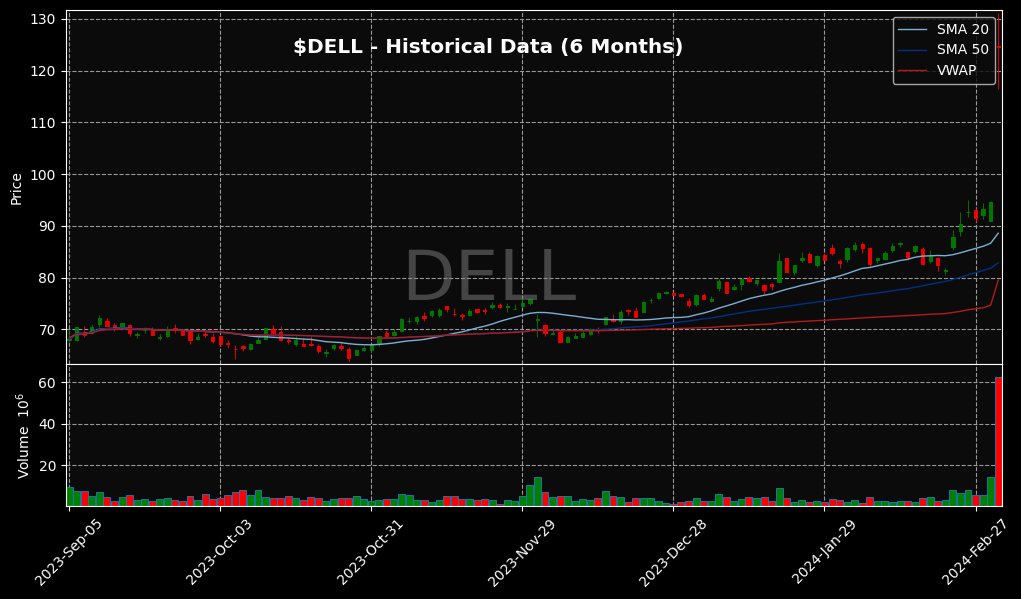

In [370]:
import mplfinance as mpf
# candlestick chart
# MANDATORY DATA = 'open', 'high', 'low', 'close', 'volume'

"""
Part 1:    
"""
# Part 1a: SMAs -> calculate
dell_df['SMA20'] = dell_df['close'].rolling(window=20, min_periods=1).mean()
dell_df['SMA50'] = dell_df['close'].rolling(window=50, min_periods=1).mean()
# dell_df['SMA200'] = dell_df['close'].rolling(window=200, min_periods=1).mean()

# Part 1b: VWAP -> calculate
dell_df['VWAP'] = (dell_df['volume'] * (dell_df['high'] + dell_df['low'] + dell_df['close']) / 3).cumsum() / dell_df['volume'].cumsum()

"""   
Part 2: 
"""
add2plot = [
    #### SMAs ####
    mpf.make_addplot(dell_df['SMA20'], color='#7BAFD4', width=1.0, label='SMA 20'), # UNC blue
    mpf.make_addplot(dell_df['SMA50'], color='#003087', width=1.0, label='SMA 50'), # DUKE blue
    # mpf.make_addplot(dell_df['SMA200'], color='#041E42', width=1.0, label='SMA 200'), # HOYAS blue
    #### VWAP ####
    mpf.make_addplot(dell_df['VWAP'], color='#B31B1B', width=1.0, label='VWAP') # BIG RED
]

"""   
Part 3: styling not iterative changes related to data (i.e., color, font, etc.)
"""
# Use a dark theme style and set text color to white
mpf_style = mpf.make_mpf_style(base_mpf_style='nightclouds', rc={'text.color': 'white'})

# Plot the candlestick chart with the moving averages
fig, axes = mpf.plot(dell_df,
                     type='candle',
                     addplot=add2plot,
                     volume=True,
                    #  style=mpf_style,
                     style=s, 
                     # WTF look at docs (it's not erroring out but going to default style just figure out what that is i think)
                     figratio=(15, 8),
                     title='$DELL - Historical Data (6 Months)',
                     tight_layout=True,
                     returnfig=True)

# Add a watermark if needed
fig.text(0.5, 0.5, 'DELL', fontsize=50, color='gray', alpha=0.5, ha='center', va='center', rotation=0, transform=fig.transFigure)

plt.show()


In [371]:
dell_df.head(5)

,symbol,close,high,low,open,volume,SMA20,SMA50,VWAP
date,,,,,,,,,
2023-09-05,DELL,68.10,69.8300,67.54,68.05,9466373.0,68.100000,68.100000,68.490000
2023-09-06,DELL,70.47,70.4800,67.83,68.00,7585616.0,69.285000,69.285000,68.980820
2023-09-07,DELL,68.98,70.6197,68.57,69.47,7649325.0,69.183333,69.183333,69.107501
2023-09-08,DELL,70.50,70.8900,69.09,69.37,5550484.0,69.512500,69.512500,69.300610
2023-09-11,DELL,72.16,72.8200,70.56,71.12,7449202.0,70.042000,70.042000,69.803676


In [358]:
""" 
ISSUE: some weird shit with the style param
nbd tho ctfo. 

workaround =  is first successfully run with style=mpf_style, then swap it for style=s (dark mode - but common view like Ortex)  
the blue shit and mpf_style is actually cool but might confuse user (i.e., blue = red and white = green) with the mpf_style
experienced similar shit like this years ago, idunno will get to it.

"""

' \nISSUE: some weird shit with the style param\nnbd tho ctfo. \n\nworkaround =  is first successfully run with style=mpf_style, then swap it for style=s (dark mode - but common view like Ortex)  \nthe blue shit and mpf_style is actually cool but might confuse user (i.e., blue = red and white = green) with the mpf_style\nexperienced similar shit like this years ago, idunno will get to it.\n\n'

In [359]:
# you're going to need different charts, one for the pre-market, and at least another for market open
# I'd like market opens to be a live feed but really we might already be in trading view watching the pine script execute

# Trend lines

| END OF IN PROGRESS WORK - NOTES BELOW |
|--|

In [360]:
# but first start with getting lines on that chart with STRV
# let's get those key levels with an output on them and figure out your strategy
# figure out when fibonacci extensions get activated
# i see one view with a grid layout of the stock charts above or below them the summary with the key levels, current price and all that
# i also see a view where when looking at individiual stocks we got data all over that shit. idgaf if it's "confusing for the user"

# you have your key_levels_df
# so start next from there okay

#### </b> ####

# make title more symetrically bigger not just bigger for fucks sake 
# move price to the right side, keep vol on left
# see if you can get a marker or military like custom google font one of the ones you like
# better yet use that program you wrote for sn logos actually to create your shit
# could put that Sans Peur Systems somewhere at least watermark it, maybe?
# key levels find up to 6?, scoring strategy?, then base allotment of position (1/3, 1/5) conditionally?
# we could add RSI down there, fuck could add ichimoku, do whatever with all this data access now

NOTES -> SMA Legend

In [361]:
# # SMA20, SMA50, and SMA200 has to be in 'dell_df'
# legend_info = {
#     'Indicator': ['SMA20', 'SMA50', 'SMA200'],
#     'Color': ['blue', 'orange', 'green'],
#     'Description': ['20-day Moving Average', '50-day Moving Average', '200-day Moving Average']
# }

# legend_df = pd.DataFrame(legend_info)
# print(legend_df)


NOTES -> custom mplfinance chart setup example

In [362]:
# """    
# Custom Theme setup
# """

# dark_style = mpf.make_mpf_style(base_mpf_style='charles', 
#                                 rc={'axes.facecolor': 'black',
#                                     'figure.facecolor': 'darkslategrey',
#                                     'axes.grid': True,
#                                     'grid.color': 'gray',
#                                     'grid.linestyle': '--',
#                                     'grid.linewidth': 0.6,
#                                     'axes.titlesize': 16,
#                                     'axes.titleweight': 'bold',
#                                     'axes.labelsize': 12,
#                                     'axes.labelweight': 'bold',
#                                     'axes.labelcolor': 'white',
#                                     'axes.edgecolor': 'white',
#                                     'axes.linewidth': 2,
#                                     'xtick.color': 'white',
#                                     'xtick.labelsize': 10,
#                                     'ytick.color': 'white',
#                                     'ytick.labelsize': 10,
#                                     'figure.titlesize': 18,
#                                     'figure.titleweight': 'bold',
#                                     'legend.facecolor': 'grey',
#                                     'legend.edgecolor': 'white',
#                                     'legend.fontsize': 10,
#                                     'legend.title_fontsize': 12})

# mpf.plot(strv_df, 
#          type='candle', 
#          style=dark_style,  # Using the custom dark style
#          volume=True, 
#          title='STRV Candlestick Chart',
#          mav=(20, 50, 200),  # Adding moving averages of 20, 50, and 200 periods
#          figratio=(15, 8), 
#          tight_layout=True)

In [363]:
# i need a math checker for trading days vs calendar days (252/365)

Notes -> yahoo finance API exaple (free) *with limitations

In [364]:
# import yfinance as yf
# from datetime import datetime, timedelta

In [365]:
# # yahoo finance data download
# start = datetime.now() - timedelta(days=60)
# end = datetime.now()
# yahoo_df = yf.download(gap_up_stocks_list, start, end)
# yahoo_df = yahoo_df.loc[:,'Close']
# # view the yahoo data yahoo finance formatting multi-index (has a 60day max with standard API maneuvers)
# yahoo_df.head(10)